In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Membaca dataset
data = pd.read_csv('/content/dataset baru.csv', encoding='latin1', delimiter=';')

In [ ]:
# Ubah format tahun-kuartal menjadi format datetime
data['Date'] = pd.to_datetime(data['Date'].str.replace('/', '-'), format='%d-%m-%Y')

In [ ]:
# Cek daftar kolom
print(data.columns)

# Memilih variabel yang akan digunakan untuk memprediksi pendapatan perusahaan
X = data[['Debt-to-Equity', 'Current Ratio', 'Earnings per Share', 'Return On Capital Employed', 'Net Margin Profit', 'Inventory Turnover Ratio', 'Net Income', 'Assets', 'Liabilities', 'Equity']]
y = data['Revenue']

# Cetak hasil pemilihan kolom
print(X)
print(y)

Index(['Companies', 'Date', 'Revenue', 'Net Income', 'Assets',
       'non-current assets', 'Liabilities', 'Equity', 'Shares outstanding',
       'Debt-to-Equity', 'Current Ratio', 'Earnings per Share',
       'Return On Capital Employed', 'Net Margin Profit',
       'Inventory Turnover Ratio'],
      dtype='object')
      Debt-to-Equity  Current Ratio  Earnings per Share  \
0               0.00           2.01              545.63   
1               0.00           1.53              505.39   
2               0.00           1.19              349.81   
3               0.00           1.94              323.58   
4               0.00           1.72              143.65   
...              ...            ...                 ...   
1339            0.05           2.14              243.28   
1340            0.05           2.42              100.88   
1341            0.05           2.54               88.84   
1342            0.04           2.55              154.52   
1343            0.13           1

In [ ]:
print(f"Original data shape: {data.shape}")

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setelah pembagian data
print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Mengubah bentuk data menjadi 2D array
#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)

# Membuat objek imputer untuk data fitur
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada data latih dan data uji untuk fitur
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Membuat objek imputer untuk kolom target
target_imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada kolom target
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))

# Setelah imputasi
print(f"Train data shape after imputation: {X_train_imputed.shape}, Test data shape after imputation: {X_test_imputed.shape}")

# Konversi kembali ke Series
y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

Original data shape: (1344, 15)
Train data shape: (1075, 10), Test data shape: (269, 10)
Train data shape after imputation: (1075, 10), Test data shape after imputation: (269, 10)


In [ ]:
# Membuat model regresi linear
model_lr = LinearRegression()
model_lr.fit(X_train_imputed, y_train_imputed)

LinearRegression()

In [ ]:
# Membuat prediksi menggunakan data uji yang telah diimputasi
y_pred_lr = model_lr.predict(X_test_imputed)

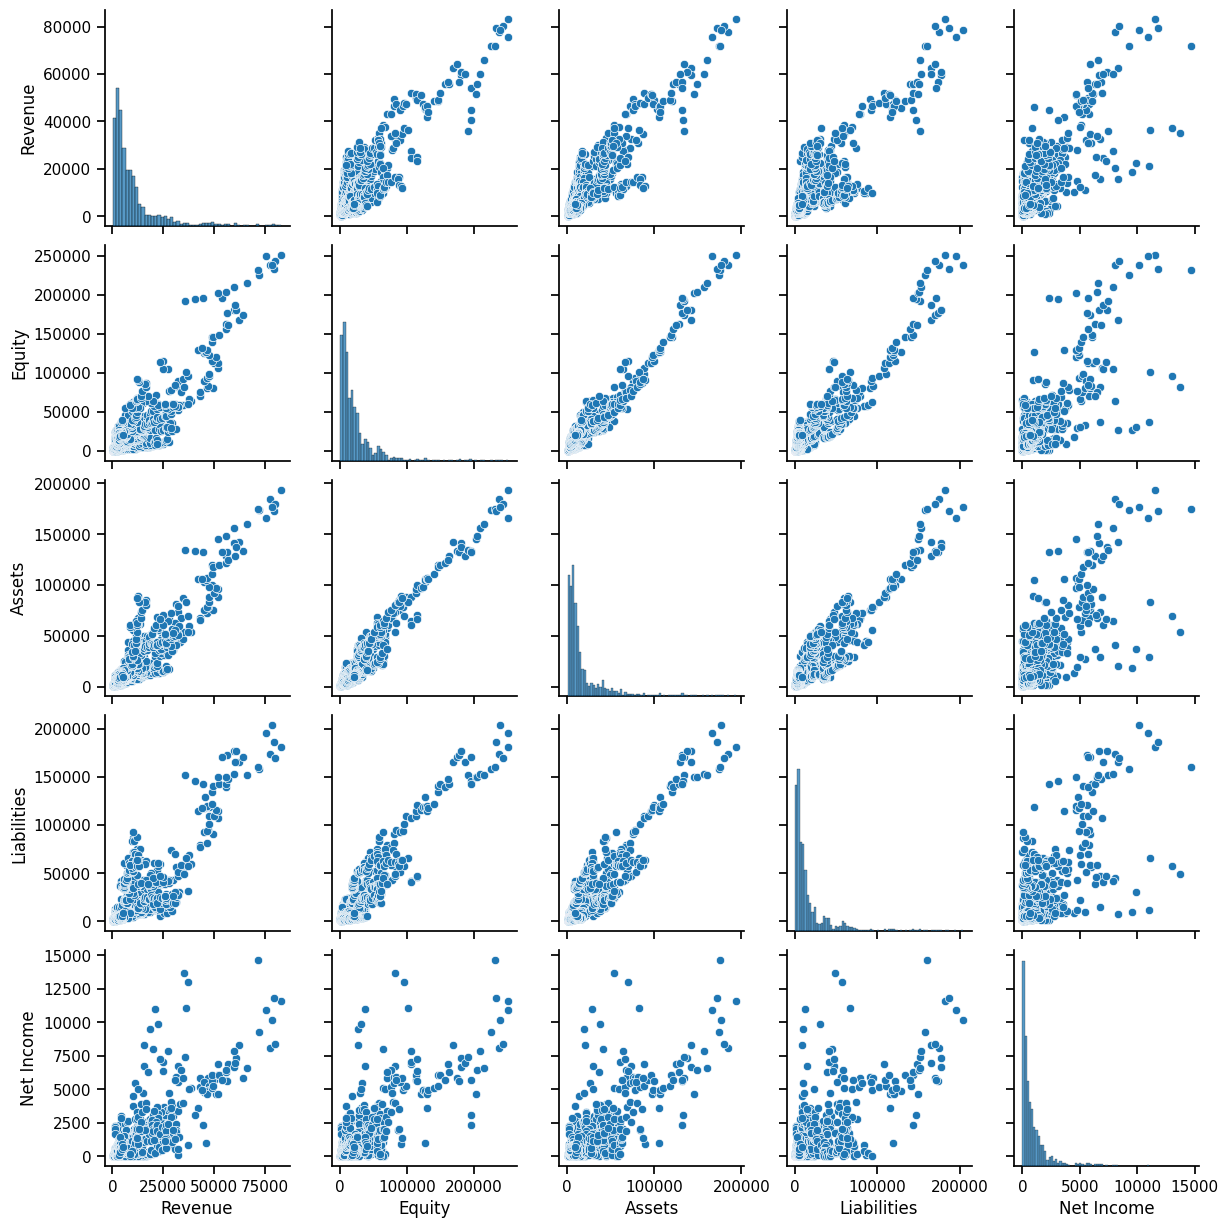

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected features to include in the pair plot
selected_features = ['Revenue', 'Equity', 'Assets', 'Liabilities', 'Net Income']

sns.set_context("notebook", font_scale=1)

# Subset the dataframe to include only the selected features
data_subset = data[selected_features]

# Create the pair plot with the selected features
sns.pairplot(data_subset)
plt.show()

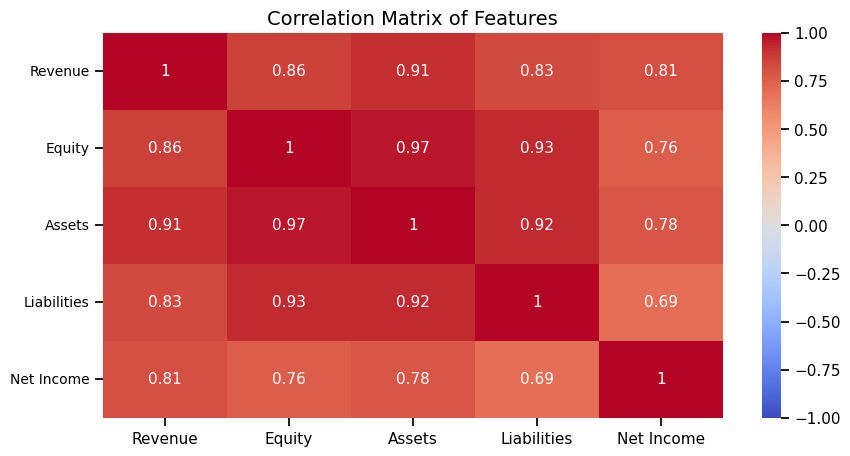

In [ ]:
X = data_subset.drop('Revenue', axis=1)
y = data_subset['Revenue']

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 11})
plt.title('Correlation Matrix of Features', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.show()

## 1 Prediktor

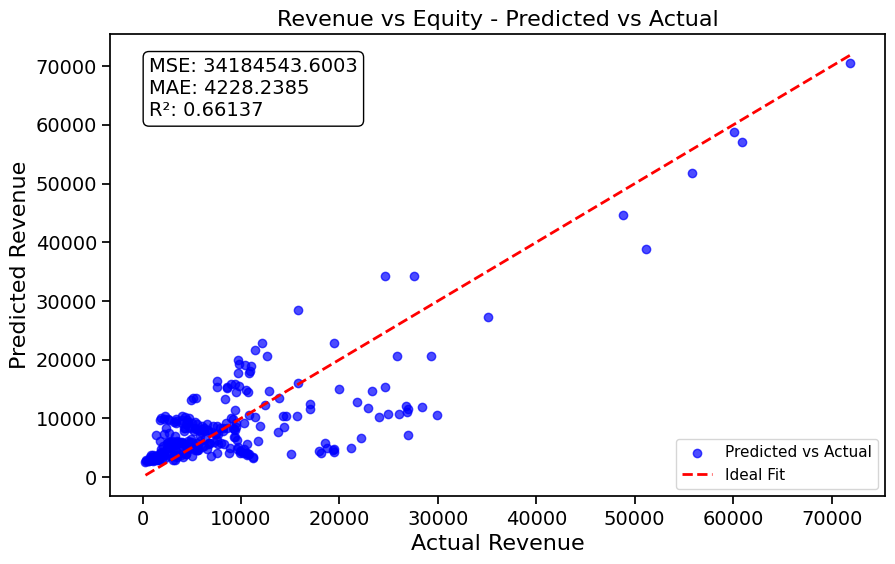

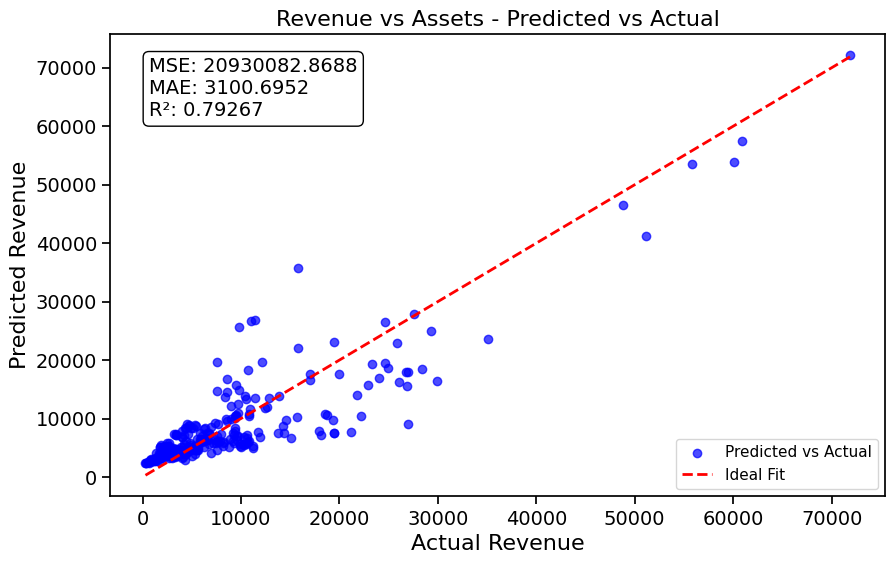

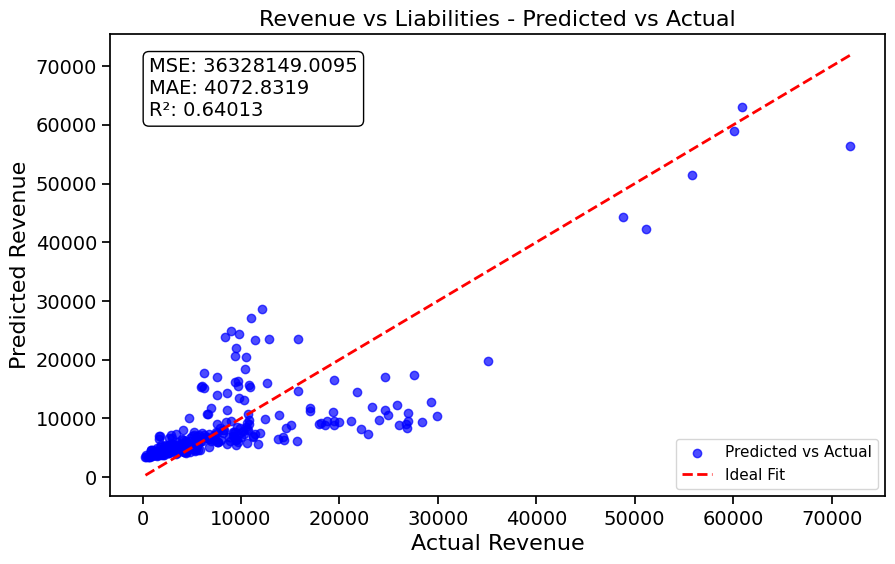

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

features = ['Equity', 'Assets', 'Liabilities']
target = 'Revenue'

# Fungsi untuk melakukan imputasi dan pembagian data
def prepare_data(data, feature, target):
    X = data[[feature]]
    y = data[target]

    # Pembagian dataset menjadi data latih dan data uji (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Membuat objek imputer untuk data fitur dengan strategi mean
    imputer = SimpleImputer(strategy='mean')

    # Melakukan imputasi pada data latih dan data uji untuk fitur
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Membuat objek imputer untuk kolom target dengan strategi mean
    target_imputer = SimpleImputer(strategy='mean')

    # Melakukan imputasi pada kolom target
    y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
    y_test_imputed = target_imputer.fit_transform(y_test.values.reshape(-1, 1))

    # Konversi kembali ke Series
    y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)
    y_test_imputed = pd.Series(y_test_imputed.flatten(), index=y_test.index)

    return X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed

# Fungsi untuk membuat dan melatih model Linear Regression
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Fungsi untuk membuat scatterplot prediksi vs target dengan metrik evaluasi
def plot_predicted_vs_actual(y_true, y_pred, title, mse, mae, r2):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.text(0.05, 0.95, f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.legend(loc='lower right')
    plt.show()

# Loop melalui setiap fitur dan buat scatterplot untuk data train dan test
for feature in features:
    X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = prepare_data(data, feature, target)
    model = train_model(X_train_imputed, y_train_imputed)

    # Prediksi untuk data train dan test
    y_train_pred = model.predict(X_train_imputed)
    y_test_pred = model.predict(X_test_imputed)

    # Menghitung metrik evaluasi untuk data train
    train_mse = mean_squared_error(y_train_imputed, y_train_pred)
    train_mae = mean_absolute_error(y_train_imputed, y_train_pred)
    train_r2 = r2_score(y_train_imputed, y_train_pred)

    # Menghitung metrik evaluasi untuk data test
    test_mse = mean_squared_error(y_test_imputed, y_test_pred)
    test_mae = mean_absolute_error(y_test_imputed, y_test_pred)
    test_r2 = r2_score(y_test_imputed, y_test_pred)

    # Plot scatterplot untuk data test
    plot_predicted_vs_actual(y_test_imputed, y_test_pred, f'Revenue vs {feature} - Predicted vs Actual', test_mse, test_mae, test_r2)


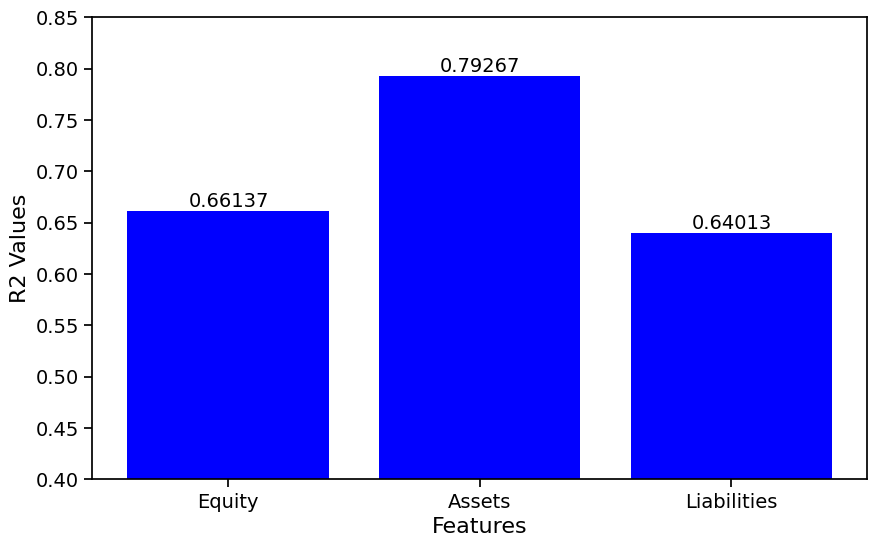

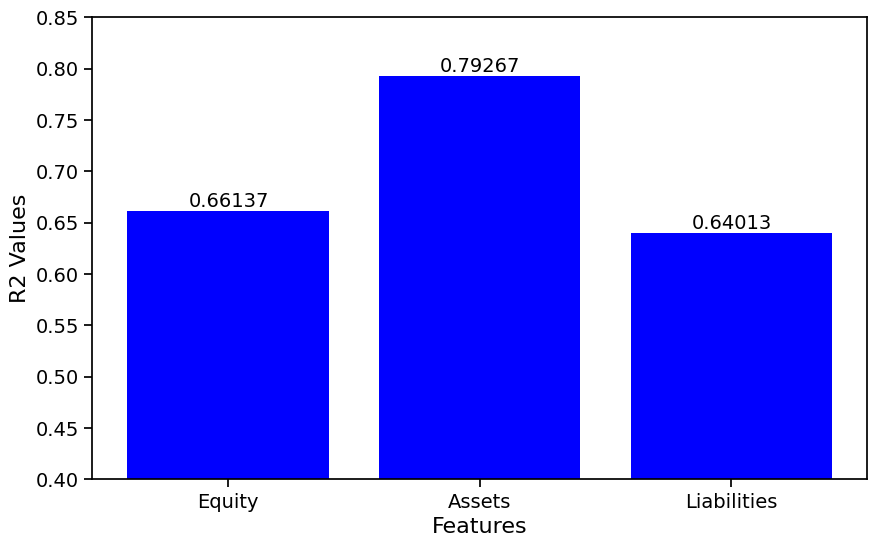

In [ ]:
# Fungsi untuk menghitung R2 dari model regresi linear sederhana
def calculate_simple_regression_errors(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_lr = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_lr)
    return r2

# Fitur dan target
features = ['Equity', 'Assets', 'Liabilities']
target = 'Revenue'

# List untuk menyimpan nilai R2
r2_values = []

# Menghitung nilai R2 untuk masing-masing fitur
for feature in features:
    X = data_subset[[feature]]
    y = data_subset[target]

    # Pembagian dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Membuat objek imputer untuk data fitur
    imputer = SimpleImputer(strategy='mean')

    # Melakukan imputasi pada data latih dan data uji untuk fitur
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Membuat objek imputer untuk kolom target
    target_imputer = SimpleImputer(strategy='mean')

    # Melakukan imputasi pada kolom target
    y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))

    # Konversi kembali ke Series
    y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

    # Menghitung nilai R2 dan menyimpan nilai R2
    r2 = calculate_simple_regression_errors(X_train_imputed, X_test_imputed, y_train_imputed, y_test)
    r2_values.append(r2)

# Membuat barplot untuk membandingkan nilai R2 dari masing-masing prediktor
plt.figure(figsize=(10, 6))
bars = plt.bar(features, r2_values, color='blue')
plt.xlabel('Features', fontsize=16)
plt.ylabel('R2 Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for bar, r2 in zip(bars, r2_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.3, yval, f'{r2:.5f}', va='bottom', fontsize=14)
plt.ylim(0.4, 0.85)
plt.show()

## 2 Prediktor

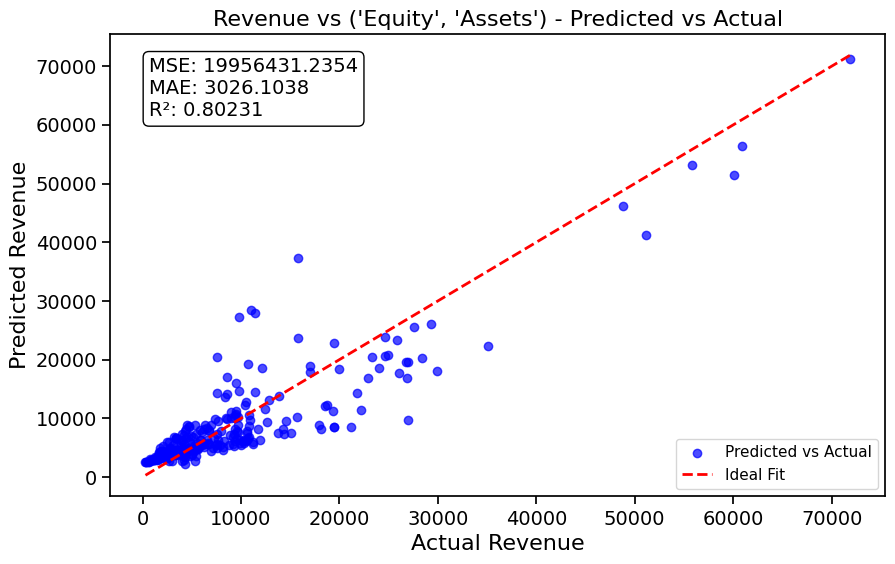

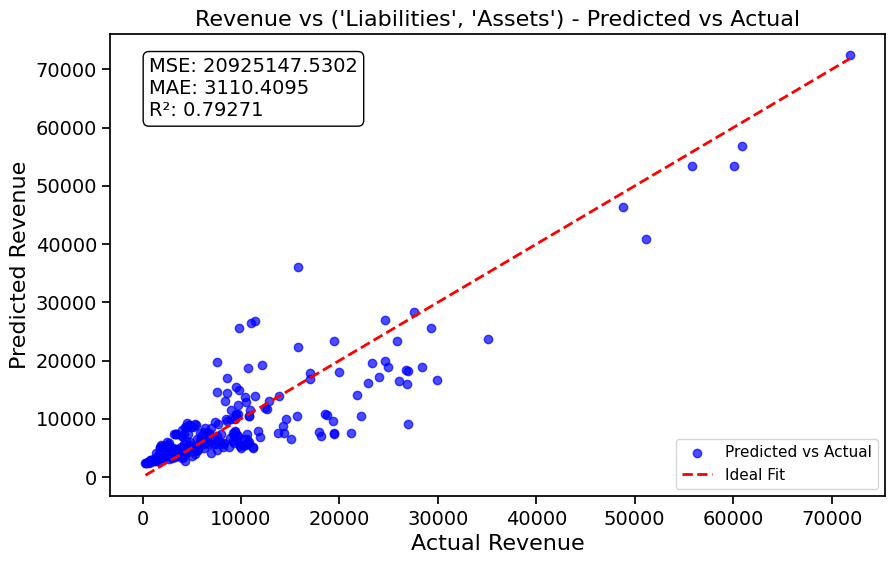

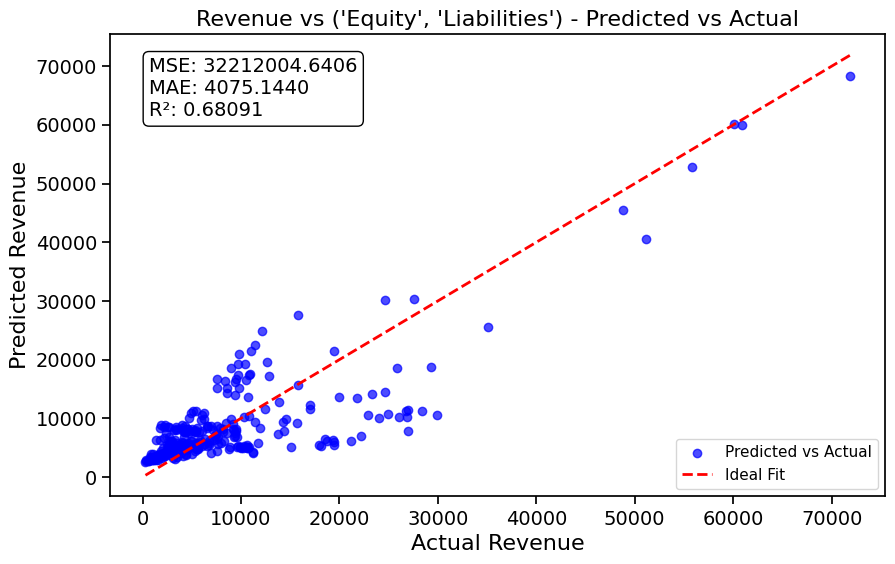

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

features = ['Equity', 'Assets', 'Liabilities']
target = 'Revenue'

# Fungsi untuk melakukan imputasi dan pembagian data
def prepare_data(data, features, target):
    X = data[features]
    y = data[target]

    # Pembagian dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Membuat objek imputer untuk data fitur dengan strategi mean
    imputer = SimpleImputer(strategy='mean')

    # Melakukan imputasi pada data latih dan data uji untuk fitur
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Membuat objek imputer untuk kolom target dengan strategi mean
    target_imputer = SimpleImputer(strategy='mean')

    # Melakukan imputasi pada kolom target
    y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
    y_test_imputed = target_imputer.fit_transform(y_test.values.reshape(-1, 1))

    # Konversi kembali ke Series
    y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)
    y_test_imputed = pd.Series(y_test_imputed.flatten(), index=y_test.index)

    return X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed

# Fungsi untuk membuat dan melatih model Linear Regression
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Fungsi untuk membuat scatterplot prediksi vs target dengan metrik evaluasi
def plot_predicted_vs_actual(y_true, y_pred, title, mse, mae, r2):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual Revenue', fontsize=16)
    plt.ylabel('Predicted Revenue', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.text(0.05, 0.95, f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.5f}',
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    plt.legend(loc='lower right')
    plt.show()

# Kombinasi dua prediktor
feature_combinations = [
    ('Equity', 'Assets'),
    ('Liabilities', 'Assets'),
    ('Equity', 'Liabilities'),
    ]

# Loop melalui setiap kombinasi fitur dan buat scatterplot untuk data train dan test
for feature_pair in feature_combinations:
    X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = prepare_data(data, list(feature_pair), target)
    model = train_model(X_train_imputed, y_train_imputed)

    # Prediksi untuk data train dan test
    y_train_pred = model.predict(X_train_imputed)
    y_test_pred = model.predict(X_test_imputed)

    # Menghitung metrik evaluasi untuk data train
    train_mse = mean_squared_error(y_train_imputed, y_train_pred)
    train_mae = mean_absolute_error(y_train_imputed, y_train_pred)
    train_r2 = r2_score(y_train_imputed, y_train_pred)

    # Menghitung metrik evaluasi untuk data test
    test_mse = mean_squared_error(y_test_imputed, y_test_pred)
    test_mae = mean_absolute_error(y_test_imputed, y_test_pred)
    test_r2 = r2_score(y_test_imputed, y_test_pred)

    # Plot scatterplot untuk data test
    plot_predicted_vs_actual(y_test_imputed, y_test_pred, f'Revenue vs {feature_pair} - Predicted vs Actual', test_mse, test_mae, test_r2)


## 3 Prediktor

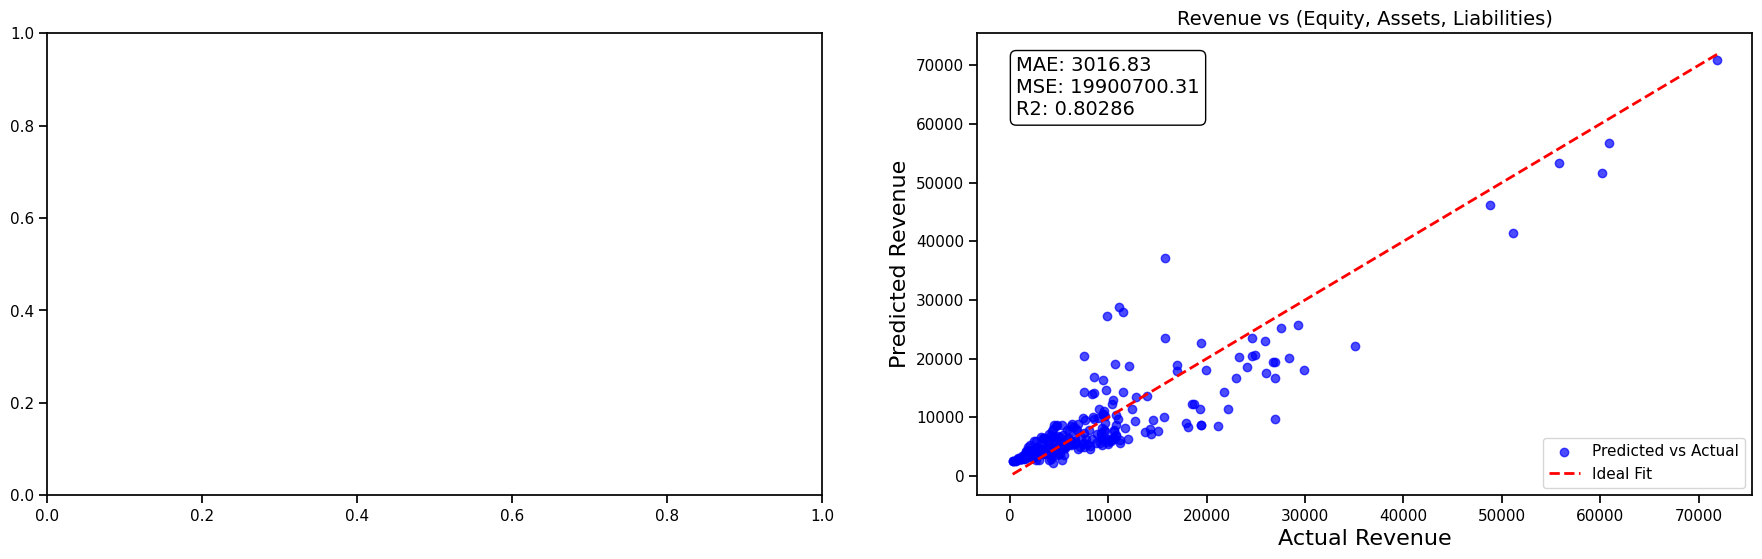

Prediktor: Equity, Assets, Liabilities
Test MAE: 3016.83
Test MSE: 19900700.31
Test R2: 0.80286
Koefisien: Equity: -0.09554, Assets: 0.50628, Liabilities: 0.01179
Intercept: 2265.66



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fungsi untuk menghitung MAE, MSE, R2, koefisien, dan intercept dari model regresi linear berganda
def calculate_multiple_regression_errors(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    coef = model.coef_
    intercept = model.intercept_

    return mae_train, mse_train, r2_train, mae_test, mse_test, r2_test, coef, intercept, y_pred_train, y_pred_test

# Fungsi untuk membuat scatterplot terpisah untuk data latih dan data uji dengan nilai MAE, MSE, R2, koefisien, dan intercept sebagai teks
def plot_regression_results_3_features(X_train, X_test, y_train, y_test, x1_col, x2_col, x3_col, y_col):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mae_train, mse_train, r2_train, mae_test, mse_test, r2_test, coef, intercept, _, _ = calculate_multiple_regression_errors(X_train, X_test, y_train, y_test)

    fig, axs = plt.subplots(1, 2, figsize=(22, 6))

    axs[1].scatter(y_test, y_pred_test, color='blue', alpha=0.7, label='Predicted vs Actual')
    axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
    axs[1].set_xlabel(f'Actual {y_col}', fontsize=16)
    axs[1].set_ylabel(f'Predicted {y_col}', fontsize=16)
    axs[1].set_title(f'{y_col} vs ({x1_col}, {x2_col}, {x3_col})', fontsize=14)
    axs[1].legend(loc='lower right')
    axs[1].text(0.05, 0.95, f'MAE: {mae_test:.2f}\nMSE: {mse_test:.2f}\nR2: {r2_test:.5f}',
                transform=axs[1].transAxes, fontsize=14, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

    plt.show()

    # Mencetak deskripsi MAE, MSE, R2, koefisien, dan intercept
    print(f'Prediktor: {x1_col}, {x2_col}, {x3_col}')
    print(f'Test MAE: {mae_test:.2f}')
    print(f'Test MSE: {mse_test:.2f}')
    print(f'Test R2: {r2_test:.5f}')
    print(f'Koefisien: {x1_col}: {coef[0]:.5f}, {x2_col}: {coef[1]:.5f}, {x3_col}: {coef[2]:.5f}')
    print(f'Intercept: {intercept:.2f}')
    print('')

# Kombinasi 3 fitur
feature_combinations_3 = [
    ('Equity', 'Assets', 'Liabilities'),
]

# Melakukan imputasi pada data latih dan data uji untuk fitur
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada kolom target
target_imputer = SimpleImputer(strategy='mean')

# Membuat scatterplot untuk setiap kombinasi fitur
for combination in feature_combinations_3:
    x1_col, x2_col, x3_col = combination
    X = data[[x1_col, x2_col, x3_col]]
    y = data['Revenue']

    # Pembagian dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Melakukan imputasi pada data latih dan data uji untuk fitur
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Melakukan imputasi pada kolom target
    y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))

    # Konversi kembali ke Series
    y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

    plot_regression_results_3_features(X_train_imputed, X_test_imputed, y_train_imputed, y_test, x1_col, x2_col, x3_col, 'Revenue')


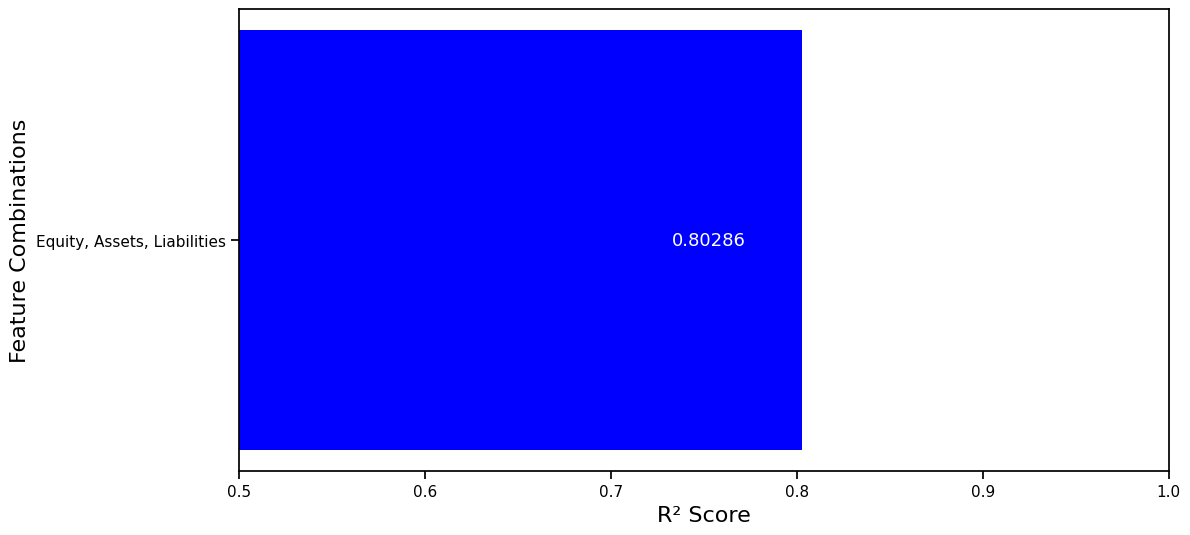

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fungsi untuk menghitung MAE, MSE, R2, koefisien, dan intercept dari model regresi linear berganda
def calculate_multiple_regression_errors(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_lr = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_lr)
    mse = mean_squared_error(y_test, y_pred_lr)
    r2 = r2_score(y_test, y_pred_lr)
    coef = model.coef_
    intercept = model.intercept_

    return mae, mse, r2, coef, intercept, y_pred_lr

# Kombinasi 3 fitur
feature_combinations_3 = [
    ('Equity', 'Assets', 'Liabilities'),
    ]

# Menyimpan hasil R²
r2_scores = []

# Membuat scatterplot untuk setiap kombinasi fitur
for combination in feature_combinations_3:
    x1_col, x2_col, x3_col = combination
    X = data[[x1_col, x2_col, x3_col]]
    y = data['Revenue']

    # Pembagian dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Melakukan imputasi pada data latih dan data uji untuk fitur
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Melakukan imputasi pada kolom target
    target_imputer = SimpleImputer(strategy='mean')
    y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
    y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

    # Menghitung nilai R²
    _, _, r2, _, _, _ = calculate_multiple_regression_errors(X_train_imputed, X_test_imputed, y_train_imputed, y_test)
    r2_scores.append((combination, r2))

# Membuat grafik batang untuk membandingkan nilai R² dari setiap kombinasi 3 fitur
combinations = [f'{x1_col}, {x2_col}, {x3_col}' for (x1_col, x2_col, x3_col), _ in r2_scores]
scores = [r2 for _, r2 in r2_scores]

plt.figure(figsize=(12, 6))
bars = plt.barh(combinations, scores, color='blue')

# Menambahkan nilai R² di dalam batang
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2,
             f'{score:.5f}', ha='center', va='center', color='white', fontsize=13)

plt.xlabel('R² Score', fontsize=16)
plt.ylabel('Feature Combinations', fontsize=16)
plt.xlim(0.5, 1.0)
plt.show()


## R2 multiple regression


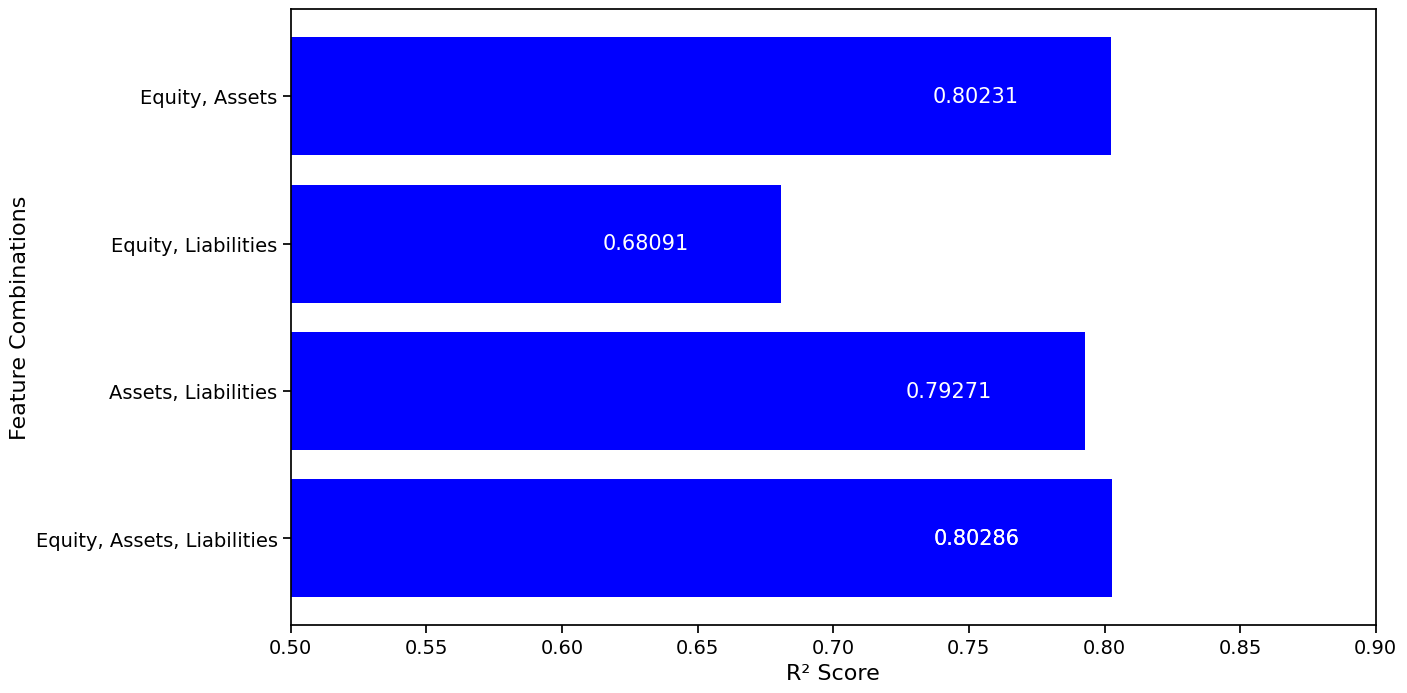

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fungsi untuk menghitung MAE, MSE, R2, koefisien, dan intercept dari model regresi linear berganda
def calculate_multiple_regression_errors(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_lr = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_lr)
    mse = mean_squared_error(y_test, y_pred_lr)
    r2 = r2_score(y_test, y_pred_lr)
    coef = model.coef_
    intercept = model.intercept_

    return mae, mse, r2, coef, intercept, y_pred_lr

# Kombinasi 2 fitur
feature_combinations_2 = [
    ('Equity', 'Assets'),
    ('Equity', 'Liabilities'),
    ('Assets', 'Liabilities'),
]

# Kombinasi 3 fitur
feature_combinations_3 = [
    ('Equity', 'Assets', 'Liabilities'),
]

# Menyimpan hasil R²
r2_scores = []

# Fungsi untuk menghitung dan menyimpan nilai R²
def compute_r2_scores(combinations):
    scores = []
    for combination in combinations:
        X = data[list(combination)]
        y = data['Revenue']

        # Pembagian dataset menjadi data latih dan data uji
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Melakukan imputasi pada data latih dan data uji untuk fitur
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        # Melakukan imputasi pada kolom target
        target_imputer = SimpleImputer(strategy='mean')
        y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
        y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

        # Menghitung nilai R²
        _, _, r2, _, _, _ = calculate_multiple_regression_errors(X_train_imputed, X_test_imputed, y_train_imputed, y_test)
        scores.append((combination, r2))

    return scores

# Menghitung nilai R² untuk kombinasi 2 fitur, 3 fitur, dan semua fitur
r2_scores_2 = compute_r2_scores(feature_combinations_2)
r2_scores_3 = compute_r2_scores(feature_combinations_3)

# Menghitung nilai R² untuk semua fitur
all_features = ['Equity', 'Assets', 'Liabilities']
X = data[all_features]
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
target_imputer = SimpleImputer(strategy='mean')
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)
_, _, r2_all, _, _, _ = calculate_multiple_regression_errors(X_train_imputed, X_test_imputed, y_train_imputed, y_test)
r2_scores_all = [(tuple(all_features), r2_all)]

# Menggabungkan semua hasil R²
r2_scores = r2_scores_2 + r2_scores_3 + r2_scores_all

# Membuat grafik batang untuk membandingkan nilai R² dari setiap kombinasi fitur
combinations = [', '.join(comb) for comb, _ in r2_scores]
scores = [r2 for _, r2 in r2_scores]

plt.figure(figsize=(14, 8))
bars = plt.barh(combinations, scores, color='blue')

# Menambahkan nilai R² di dalam batang
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2,
             f'{score:.5f}', ha='center', va='center', color='white', fontsize=15)

plt.xlabel('R² Score', fontsize=16)
plt.ylabel('Feature Combinations', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0.5, 0.9)
plt.gca().invert_yaxis()  # Membalik sumbu y agar kombinasi dengan R² tertinggi berada di atas
plt.show()

## R2 all feature combinations

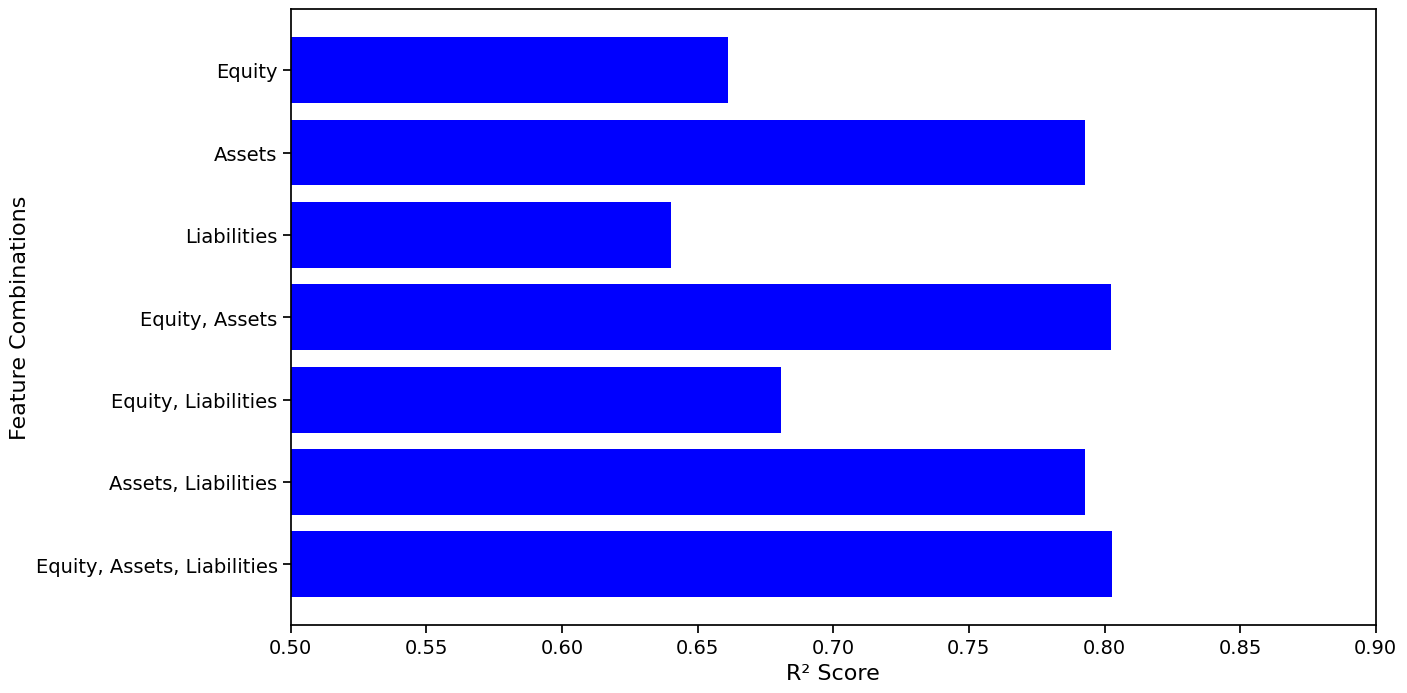

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fungsi untuk menghitung MAE, MSE, R2, koefisien, dan intercept dari model regresi linear berganda
def calculate_multiple_regression_errors(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_lr = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_lr)
    mse = mean_squared_error(y_test, y_pred_lr)
    r2 = r2_score(y_test, y_pred_lr)
    coef = model.coef_
    intercept = model.intercept_

    return mae, mse, r2, coef, intercept, y_pred_lr

# Kombinasi 1 fitur
feature_combinations_1 = [
    ('Equity',),
    ('Assets',),
    ('Liabilities',)
]

# Kombinasi 2 fitur
feature_combinations_2 = [
    ('Equity', 'Assets'),
    ('Equity', 'Liabilities'),
    ('Assets', 'Liabilities')
]

# Kombinasi 3 fitur
feature_combinations_3 = [
    ('Equity', 'Assets', 'Liabilities')
]

# Menyimpan hasil R²
r2_scores = []

# Fungsi untuk menghitung dan menyimpan nilai R²
def compute_r2_scores(combinations):
    scores = []
    for combination in combinations:
        X = data[list(combination)]
        y = data['Revenue']

        # Pembagian dataset menjadi data latih dan data uji
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Melakukan imputasi pada data latih dan data uji untuk fitur
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        # Melakukan imputasi pada kolom target
        target_imputer = SimpleImputer(strategy='mean')
        y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
        y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

        # Menghitung nilai R²
        _, _, r2, _, _, _ = calculate_multiple_regression_errors(X_train_imputed, X_test_imputed, y_train_imputed, y_test)
        scores.append((combination, r2))

    return scores

# Menghitung nilai R² untuk kombinasi 1 fitur, 2 fitur, 3 fitur, dan semua fitur
r2_scores_1 = compute_r2_scores(feature_combinations_1)
r2_scores_2 = compute_r2_scores(feature_combinations_2)
r2_scores_3 = compute_r2_scores(feature_combinations_3)

# Menghitung nilai R² untuk semua fitur
all_features = ['Equity', 'Assets', 'Liabilities']
X = data[all_features]
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
target_imputer = SimpleImputer(strategy='mean')
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)
_, _, r2_all, _, _, _ = calculate_multiple_regression_errors(X_train_imputed, X_test_imputed, y_train_imputed, y_test)
r2_scores_all = [(tuple(all_features), r2_all)]

# Menggabungkan semua hasil R²
r2_scores = r2_scores_1 + r2_scores_2 + r2_scores_3 + r2_scores_all

# Membuat grafik batang untuk membandingkan nilai R² dari setiap kombinasi fitur
combinations = [', '.join(comb) for comb, _ in r2_scores]
scores = [r2 for _, r2 in r2_scores]

plt.figure(figsize=(14, 8))
bars = plt.barh(combinations, scores, color='blue')

# Menambahkan nilai R² di dalam batang
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{score:.5f}', ha='left', va='center', color='white', fontsize=13)

plt.xlabel('R² Score', fontsize=16)
plt.ylabel('Feature Combinations', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0.5, 0.9)
plt.gca().invert_yaxis()  # Membalik sumbu y agar kombinasi dengan R² tertinggi berada di atas
plt.show()
